4. Median of Two Sorted Arrays

Hard

Given two sorted arrays nums1 and nums2 of size m and n respectively, return the median of the two sorted arrays.

The overall run time complexity should be O(log (m+n)).

 

Example 1:

        Input: nums1 = [1,3], nums2 = [2]

        Output: 2.00000

        Explanation: merged array = [1,2,3] and median is 2.

Example 2:\n

        Input: nums1 = [1,2], nums2 = [3,4]

        Output: 2.50000
        
        Explanation: merged array = [1,2,3,4] and median is (2 + 3) / 2 = 2.5.

Approach 1: Merge Sort

Intuition

Let's start with the straightforward approach. If we put the elements of two arrays in one array A and arrange them in order. Assume the merged arrays has a length of n, then the median is:

        - A[n / 2], if n is odd.

        - The average of A[n / 2] and A[n / 2 + 1], if n is even.

However, we do not really need to merge and sort these arrays. Note that both arrays are already sorted, so the smallest element is either the first element of nums1 or the first element of nums2. Therefore, we can set two pointers p1 and p2 at the start of each array, then we can get the smallest element from the nums1 and nums2 by comparing the values nums1[p1] and nums2[p2].

Please refer to the following slide as an example:

Current


Algorithm

            1. Get the total size of two arrays m + n

                    If m + n is odd, we are looking for the (m + n) / 2-th element.

                    If m + n is even, we are looking for the average of the (m + n) / 2-th and the (m + n) / 2 + 1-th elements.

            2. Set two pointers p1 and p2 at the beginning of arrays nums1 and nums2.

            3. If both p1 and p2 are in bounds of the arrays, compare the values at p1 and p2:

                    If nums1[p1] is smaller than nums2[p2], we move p1 one place to the right.

                    Otherwise, we move p2 one place to the right.

            If p1 is outside nums1, just move p2 one place to the right.

            If p2 is outside nums2, just move p1 one place to the right.

            4. Get the target elements and calculate the median:

                If m + n is odd, repeat step 3 by (m + n + 1) / 2 times and return the element from the last step.
                If m + n is even, repeat step 3 by (m + n) / 2 + 1 times and return the average of the elements from the last two steps.

In [2]:
class Solution:
    def findMedianSortedArrays(self, nums1, nums2):
        m, n = len(nums1), len(nums2)
        p1, p2 = 0, 0
        
        # Get the smaller value between nums1[p1] and nums2[p2].
        def get_min():
            nonlocal p1, p2
            if p1 < m and p2 < n:
                if nums1[p1] < nums2[p2]:
                    ans = nums1[p1]
                    p1 += 1
                else:
                    ans = nums2[p2]
                    p2 += 1
            elif p2 == n:
                ans = nums1[p1]
                p1 += 1
            else:
                ans = nums2[p2]
                p2 += 1
            return ans
        
        if (m + n) % 2 == 0:
            for _ in range((m + n) // 2 - 1):
                _ = get_min()
            return (get_min() + get_min()) / 2
        else:
            for _ in range((m + n) // 2):
                _ = get_min()
            return get_min()

Approach 2: Binary Search, Recursive

Intuition

Because the inputs are sorted arrays and the problem asks for a logarithmic time limit, we strongly feel that binary search (or a similar approach) is a promising method. While we're not sure how to cast the same pattern as a normal binary search on this problem, let's go over some steps of a regular binary search and see if we can get any inspiration. (If you are not familiar with binary search, you can refer to our Binary Search Explore Card)

Here we use binary search to find target in a sorted array A:

        Locate the middle index (element) of A.

        Compare the value of the middle element with target.

        Reduce the search space by cutting the current array in half and discarding the half which is guaranteed not to contain target.

        Repeat the above process until we either empty the array (move to half a the length of 0) or find target.

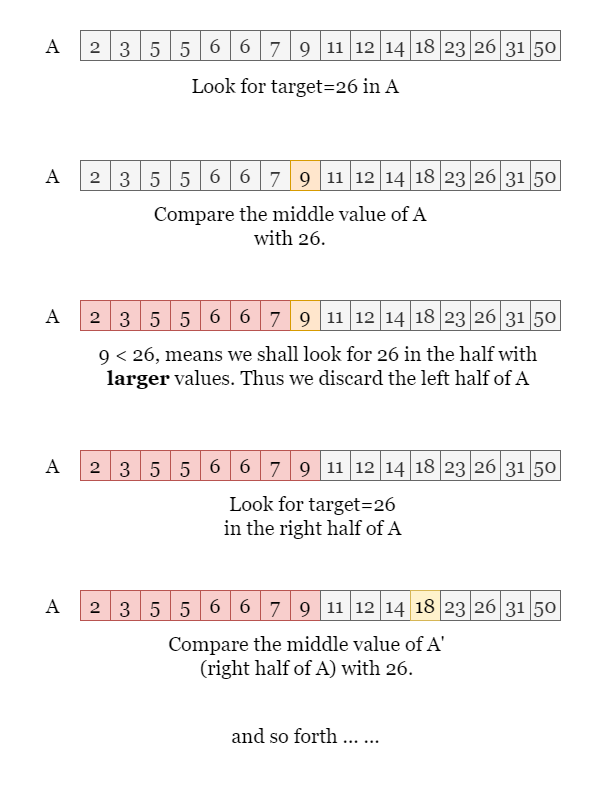

At each step, the search space is cut in half, so we can quickly get the result. Now back to this problem where we have two sorted arrays. For the sake of convenience, let's call them A and B.

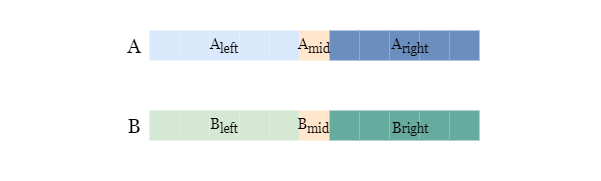

Similarly, we can get and compare their middle values A_mid and B_mid. Without loss of generality in this example we assume A_mid <= B_mid initially, as shown in the yellow boxes.

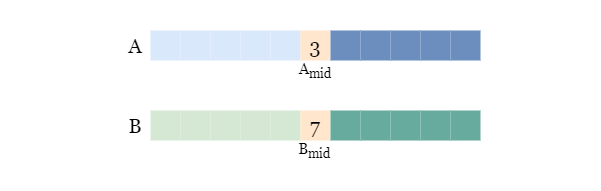

What does this comparison imply?

It implies that we can compare sections of A and B.

For the rest of this article, we will use ≤ to represent the relative magnitude of values in arrays. For example, $A_{\text{left}} \le A_{\text{right}}$ means that every element in $A_{left}$  is no larger than any element in $A_{\text{right}}$. We also 'compare' elements in an array with a single element similarly,

for example, $A_{\text{left}} \le A_{\text{mid}}$  means that every element in $A_{\text{left}}$ is no larger than the element $A_{\text{mid}}$.
This may not be the most standard way of expressing it, but is easy enough to understand.

Recall that both arrays are sorted, so we know that:

$A_{\text{left}} \le A_{\text{mid}}$
​
 
$B_{\text{mid}} \le B_{\text{right}}$
​
 
Combine these observations with the comparison we just made:

$A_{\text{mid}} \le B_{\text{mid}}$
​
 

We have the following result:

$A_{\text{left}} \le A_{\text{mid}} \le B_{\text{mid}} \le B_{\text{right}}$
​
 

Thus,

$A_{\text{left}} \le B_{\text{right}}$
​
 

As shown in the picture below:

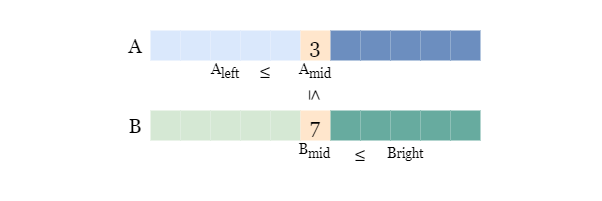

Since A is sorted, we know that $A_{\text{left}} \le A_{\text{right}}$.

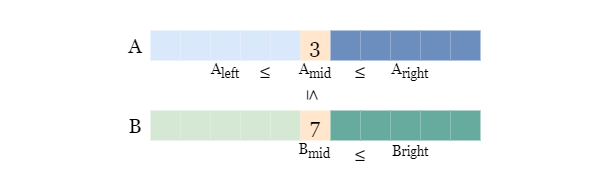

Now we know that A_left is smaller than two halves: A_right and B_right. Although we still don't know where exactly these elements are, what we do know is A_left doesn't intersect with A_right + B_right! There is an invisible boundary between the A_left segment and the mixed segment A_right + B_right. As shown in the picture below, the dashed line divides all sorted elements into two halves.

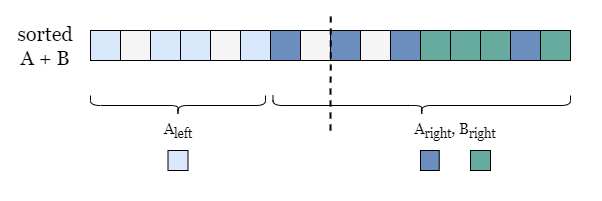

We can apply all the same logic to the mixed segment $A_{\text{left}}  + B_{\text{left}}$ and $B_{\text{right}}$, which also do not intersect. You can try to prove it yourself as an exercise.

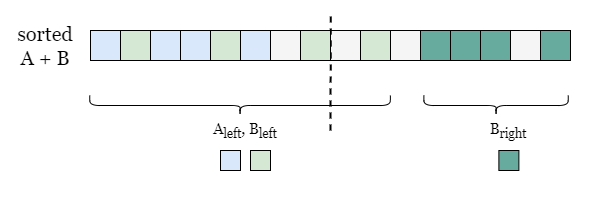

It looks somewhat clearer, we have clearly separated some subarrays. How do we continue to leverage this knowledge and use the cut-in-half method repeatedly?


The following step is the most important one.

Remember that we are looking for the median of sorted A + B which is one or two target values. We regard the index of the target value in the sorted(A + B) as k. For example:

If the lengths of A and B are 6 and 5, the target index is k = (6 + 5 + 1) / 2 = 6, we shall look for the 6th smallest element.

If the lengths of A and B are 6 and 6, the target indexes are k = (6 + 6) / 2 = 6 and k + 1 = 7, we shall look for the 6th and the 7th smallest elements.

Depending on whether the total number of elements is odd or even, we need the $k^{th}$  (and maybe the $(k + 1)^{th}$ elements. What matters is that we set an index k at the beginning and we want to find the $k^{th}$ smallest element using the Binary Search-like algorithm discussed previously (for convenience, we will discuss only the $k^{th}$  element for now).

However, during the Binary Search-like algorithm, we keep removing one half of an array, so the index k might not stay unchanged. Suppose we removed 3 elements that are smaller than the original $k^{th}$ 
th smallest element, we shall look for the $(k-3)^{th}$ smallest element from the remaining arrays.

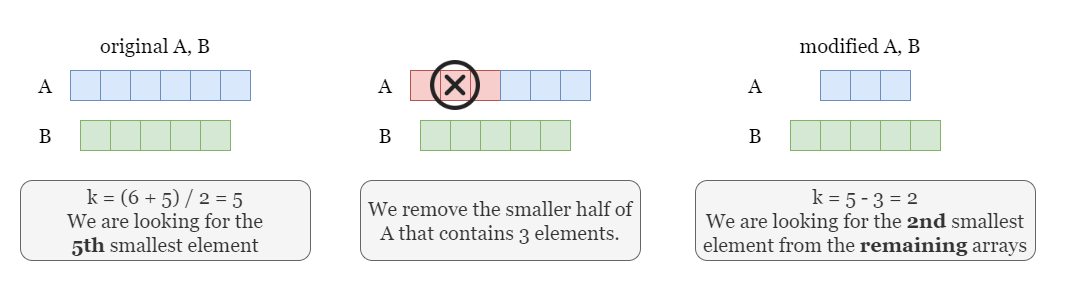

More specifically:

If k is larger than half the total number of elements in sorted(A + B), it means that the kthk^{th}k th element is in the second (larger) half of sorted(A + B), thus $A_{\text{left}}$ (or $B_{\text{left}}$, the smaller of the two smaller sections according to the comparison) is guaranteed not to contain this element, and we can safely cut this half, and reduce k by the length of the removed half.

If k is not larger than half the total number of elements in sorted(A + B), it means that the $k^{th}$ element is in the first (smaller) half of sorted(A + B), thus $B_{\text{right}}$ (or $A_{\text{right}}$, the larger of the two larger sections according to the comparison) is guaranteed not to contain this element, and we can safely discard it. Note that we don't need to modify k this time, since we removed one larger half that doesn't affect the order of the $k^{th}$ smallest element.

We can continue our search like above in the remaining arrays. The long arrow that starts from the bottom and points to the top-left indicates that we are repeating the process. Once we cut off part of either A or B, we regard the remaining arrays as modified A and B and restart this algorithm. Note that the following picture represents one case only: we consider the case that a_value < b_value, thus we remove either the smaller half of A or the larger half of B. If the comparison result is a_value >= b_value, we shall remove either the smaller half of B or the larger half of A.

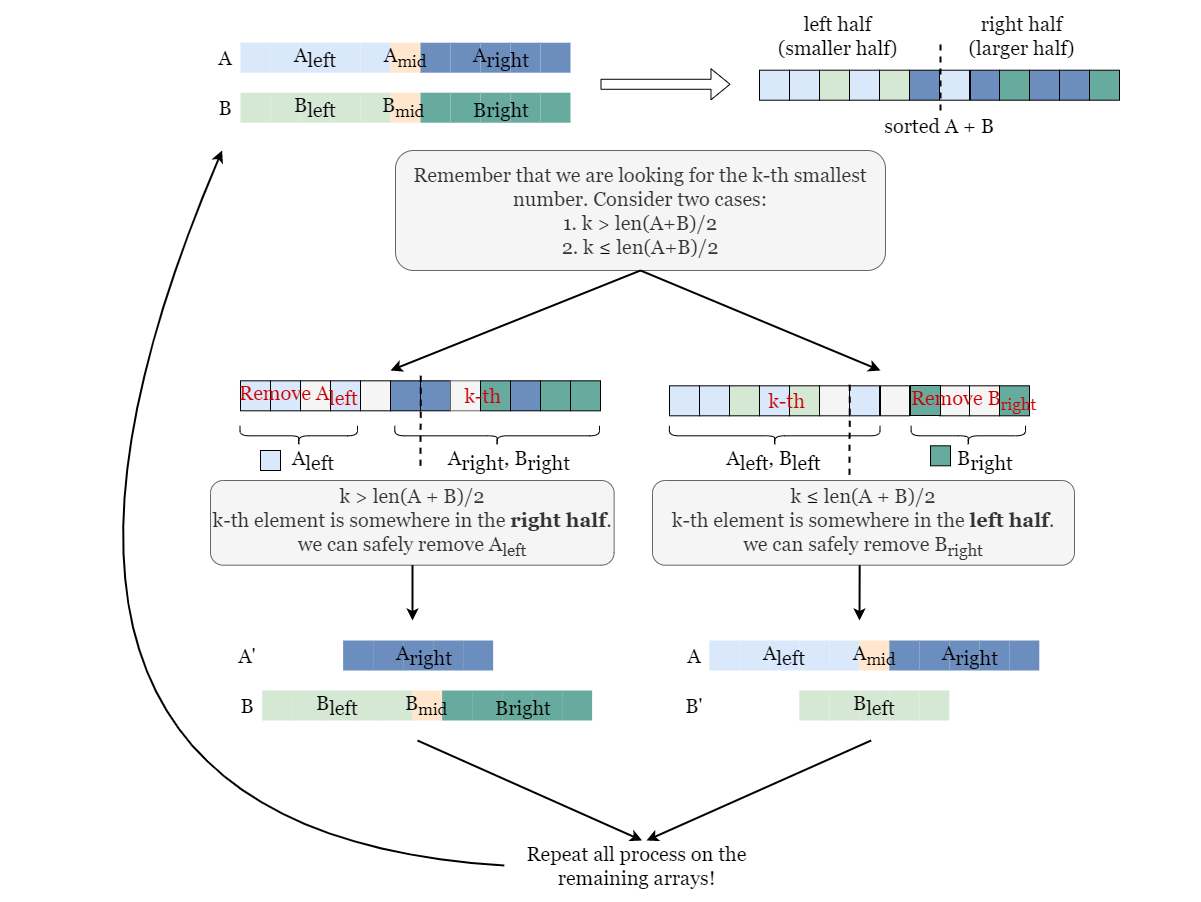

That's it. We cut one of the two arrays in half at each step, so this approach has a logarithmic time complexity which we will discuss in detail later.

One more thing!

In the previous picture, we repeat all processes using the modified arrays, but this is just for the sake of understanding. We won't create copies of two arrays repeatedly, because that would introduce a linear time complexity at least. Instead, we just treat a part of the original array as the modified array for the next step, so that we can repeat the process on the original array without making any duplication. To do this, we need to maintain four pointers, two pointers for each array, e.g., a_start and a_end represent an inclusive range [a_start, a_end] of A.

Algorithm

Let's define a function that helps us find the kthk^{th}k th smallest element from two inclusive ranges [a_start, a_end] and [b_start, b_end] from arrays A and B.

                1. If the range (for example, a range of A) is empty, in other words a_start > a_end, it means all elements in A are passed, we just return the (k - a_start)-th element from the other array B. Vice versa if b_start > b_end.

                2. Otherwise, get the middle indexes of the two ranges: a_index = (a_start + a_end) / 2, b_index = (b_start + b_end) / 2.

                3. Get the middle values of the two ranges: a_value = A[a_index], b_value = B[b_index].

                4. Cut one array in half, according to:

                        o. If a_index + b_index < k, cut one smaller half.

                                If a_value < b_value, cut the smaller half of A.

                                Otherwise, cut the smaller half of B.

                        Otherwise, cut one larger half.

                                If b_value < a_value, cut the larger half of B.

                                Otherwise, cut the larger half of A.
                                
                5. Repeat step 1 using the new starting and ending indexes of A and B.

Then we move on to find the median elements, and get the length of both arrays na = len(A) and nb = len(B).

        *. If the total number of elements in A and B is odd, we just use the above function to find the middle element, that is k = (na + nb) / 2.

        *. Otherwise, we use the function to find two middle elements: k = (na + nb) / 2 - 1 and k = (na + nb) / 2, and return their average.

In [3]:
class Solution:
    def findMedianSortedArrays(self, A, B):
        na, nb = len(A), len(B)
        n = na + nb
        
        def solve(k, a_start, a_end, b_start, b_end):
            # If the segment of on array is empty, it means we have passed all
            # its element, just return the corresponding element in the other array.
            if a_start > a_end: 
                return B[k - a_start]
            if b_start > b_end: 
                return A[k - b_start]

            # Get the middle indexes and middle values of A and B.
            a_index, b_index = (a_start + a_end) // 2, (b_start + b_end) // 2
            a_value, b_value = A[a_index], B[b_index]

            # If k is in the right half of A + B, remove the larger right half.
            if a_index + b_index < k:
                if a_value > b_value:
                    return solve(k, a_start, a_end, b_index + 1, b_end)
                else:
                    return solve(k, a_index + 1, a_end, b_start, b_end)
            # Otherwise, remove the smaller left half. 
            else:
                if a_value > b_value:
                    return solve(k, a_start, a_index - 1, b_start, b_end)
                else:
                    return solve(k, a_start, a_end, b_start, b_index - 1)
        
        if n % 2:
            return solve(n // 2, 0, na - 1, 0, nb - 1)
        else:
            return (solve(n // 2 - 1, 0, na - 1, 0, nb - 1) + solve(n // 2, 0, na - 1, 0, nb - 1)) / 2

Approach 3: A Better Binary Search

Intuition

Recall the previous approach where we perform a binary search over the 'merged' array consisting of nums1 and nums2, resulting in a time complexity of O(log⁡(m⋅n))O(\log(m \cdot n))O(log(m⋅n)). We could further improve the algorithm by performing the binary search only on the smaller array of nums1 and nums2, thus the time complexity is reduced to O(log⁡(min⁡(m,n)))O(\log(\min(m, n)))O(log(min(m,n))).

The main idea is similar to approach 2, where we need to find a point of partition in both arrays such that the maximum of the smaller half is less than or equal to the minimum of the larger half.

However, instead of partitioning over the merged arrays, we can only focus on partitioning the smaller array (let's call this array A). Suppose the partition index is partitionA, we specify that the smaller half contains (m + n + 1) / 2 elements, and we can use this feature to our advantage by directly making partitionB equal to (m + n + 1) / 2 - partitionA, thus the smaller halves of both arrays always contain a total of (m + n + 1) / 2 elements, as shown in the picture below.

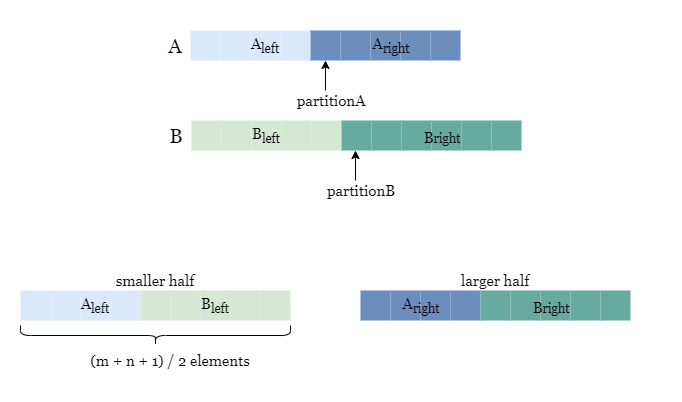

The next step is to compare these edge elements.

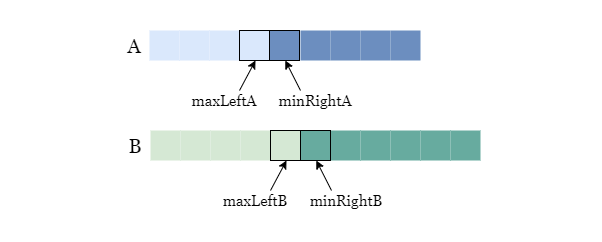

If both maxLeftA <= minRightB and maxLeftB <= minRightA hold, it means that we have partitioned arrays at the correct place.

The smaller half consists of two sections A_left and B_left
THe larger half consists of two sections A_right and B_right
We just need to find the maximum value from the smaller half as max(A[maxLeftA], B[maxLeftB]) and the minimum value from the larger half as min(A[minRightA], B[minRightB]). The median value depends on these four boundary values and the total length of the input arrays and we can compute it by situation.

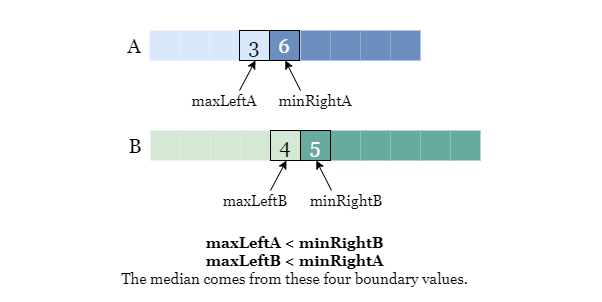

If maxLeftA > minRightB, it implies that maxLeftA is too large to be in the smaller half and we should look for a smaller partition value of A.

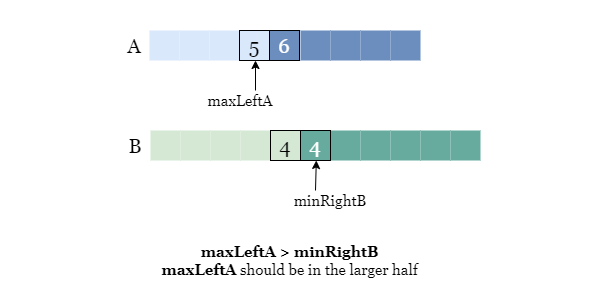

Otherwise, it denotes that minRightA is too small to be in the larger half and we should look for a larger partition value of A.

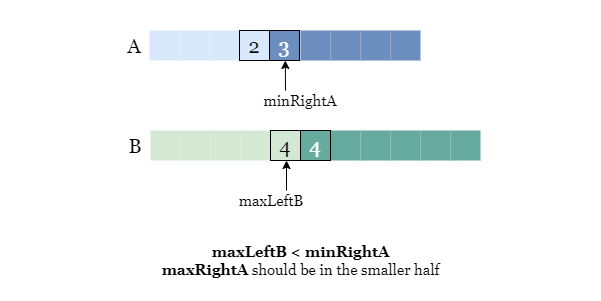

h1{Algorithm}

        1. Assuming nums1 to be the smaller array (If nums2 is smaller, we can swap them). Let m, n represent the size of nums1 and nums2, respectively.

        2. Define the search space for the partitioning index partitionA by setting boundaries as left = 0 and right = m.

        3. While left <= right holds, do the following.

        4. Compute the partition index of nums1 as partitionA = (left + right) / 2. Consequently, the partition index of nums2 is (m + n + 1) / 2 - partitionA.

        5. Obtain the edge elements:

                Determine the maximum value of the section A_left as maxLeftA = nums1[partitionA - 1]. If partitionA - 1 < 0, set it as maxLeftA = float(-inf).
                Determine the minimum value of the section A_right as minRightA = nums1[partitionA]. If partitionA >= m, set it as minRightA = float(inf).
                Determine the maximum value of the section B_left as maxLeftB = nums2[partitionB - 1]. If partitionB - 1 < 0, set it as maxLeftB = float(-inf).
                Determine the maximum value of the section B_right as minRightB = nums2[partitionB]. If partitionB >= n, set it as minRightB = float(inf).

        6. Compare and recalculate: Compare maxLeftA with minRightB and maxLeftB with minRightA.

                If maxLeftA > minRightB, it means the maxLeftA is too large to be in the smaller half, so we update right = partitionA - 1 to move to the left half of the search space.
                If maxLeftB > minRightA, it means that we are too far on the left side for partitionA and we need to go to the right half of the search space by updating left = partitionA + 1.

        Repeat step 4.

        7. When both maxLeftA <= minRightB and maxLeftB <= minRightA are true:

                If (m + n) % 2 = 0, the median value is the average of the maximum value of the smaller half and the minimum value of the larger half, given by answer = (max(maxLeftA, maxLeftB) + min(minRightA,      minRightB)) / 2.
                Otherwise, the median value is the maximum value of the smaller half, given by answer = max(maxLeftA, maxLeftB).

In [4]:
class Solution:
    def findMedianSortedArrays(self, nums1, nums2):
        if len(nums1) > len(nums2):
            return self.findMedianSortedArrays(nums2, nums1)


        m, n = len(nums1), len(nums2)
        left, right = 0, m

        while left <= right:
            partitionA = (left + right) // 2
            partitionB = (m + n + 1) // 2 - partitionA

            maxLeftA = float('-inf') if partitionA == 0 else nums1[partitionA - 1]
            minRightA = float('inf') if partitionA == m else nums1[partitionA]
            maxLeftB = float('-inf') if partitionB == 0 else nums2[partitionB - 1]
            minRightB = float('inf') if partitionB == n else nums2[partitionB]

            if maxLeftA <= minRightB and maxLeftB <= minRightA:
                if (m + n) % 2 == 0:
                    return (max(maxLeftA, maxLeftB) + min(minRightA, minRightB)) / 2
                else:
                    return max(maxLeftA, maxLeftB)
            elif maxLeftA > minRightB:
                right = partitionA - 1
            else:
                left = partitionA + 1

5. Longest Palindromic Substring (Medium)

Companies

Given a string s, return the longest palindromic substring
 in s.

 

Example 1:

        Input: s = "babad"
        Output: "bab"
        Explanation: "aba" is also a valid answer.

Example 2:

        Input: s = "cbbd"
        Output: "bb"

Approach 1: Check All Substrings

Intuition

We can start with a brute-force approach. We will simply check if each substring is a palindrome, and take the longest one that is.

First, let's talk about how we can check if a given string is a palindrome. This is a classic problem and we can do it using two pointers. If a string is a palindrome, the first character is equal to the last character. The second character is equal to the second last character, and so on.

Palindrome Check

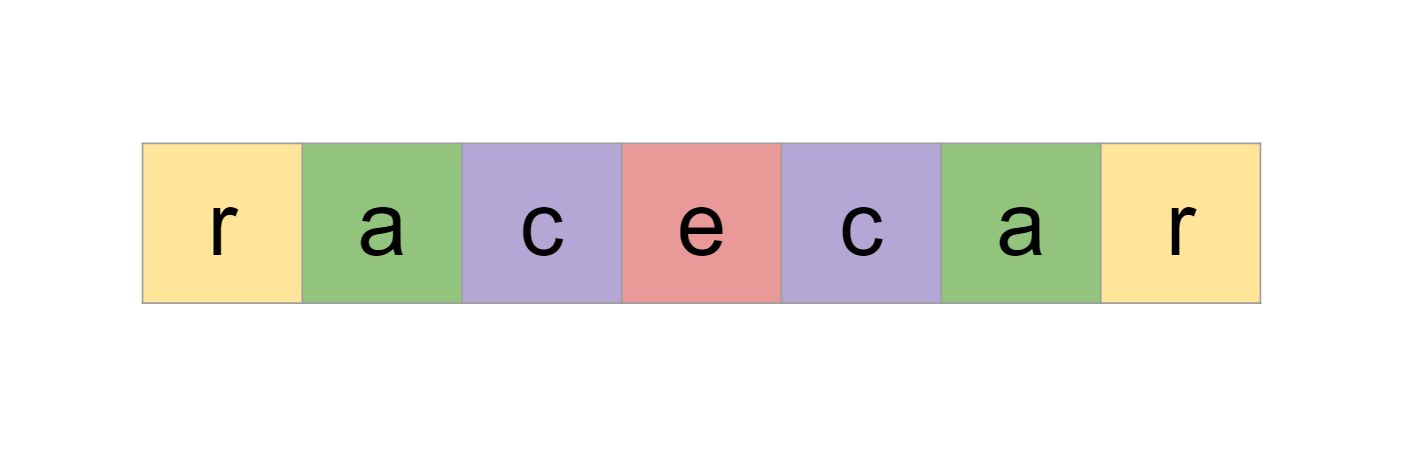

We initialize two pointers: one at the start of the string and another at the end of it. We check if the characters at the pointers are equal - if they aren't, we know the string cannot be a palindrome. If they are equal, we move to the next pair of characters by moving the pointers toward each other. We continue until we either find a mismatch or the pointers meet. If the pointers meet, then we have checked all pairs and we know the string is a palindrome.

One bonus to using this algorithm is that we frequently exit early on strings that are not palindromes. If you had a string of length 1000 and the third and third last characters did not match, we would exit the algorithm after only 3 iterations.

There's another optimization that we can do. Because the problem wants the longest palindrome, we can start by checking the longest-length substrings and iterate toward the shorter-length substrings. This way, the first time we find a substring that is a palindrome, we can immediately return it as the answer.

Algorithm

        1. Create a helper method check(i, j) to determine if a substring is a palindrome.
                1. To save space, we will not pass the substring itself. Instead, we will pass two indices that represent the substring in question. The first character will be s[i] and the last character will be s[j - 1].
                2. In this function, declare two pointers left = i and right = j - 1.
                3. While left < right, do the following steps:
                4. If s[left] != s[right], return false.
                5. Otherwise, increment left and decrement right.
                6. If we get through the while loop, return true.
        2. Use a for loop to iterate a variable length starting from s.length until 1. This variable represents the length of the substrings we are currently considering.
        3. Use a for loop to iterate a variable start starting from 0 until and including s.length - length. This variable represents the starting point of the substring we are currently considering.
        4. In each inner loop iteration, we are considering the substring starting at start until start + length. Pass these values into check to see if this substring is a palindrome. 
        If it is, return the substring.

In [6]:
def longpalingstring(s):
    def check(i,j):
        left, right = i, j-1
        while left < right:
            if s[left] != s[right]:
                return False
            else:
                left += 1
                right -=1
            return True
    for length in range(len(s),0, -1):
        for start in range(len(s) -length+1):
            if check(start, start+length):
                return s[start:start+length]
    
    return ""

a = longpalingstring('aaabddcad')
print(a)

                

            


aaabddca


Approach 2: Dynamic Programming

Intuition

Let's say that we knew the substring with inclusive bounds i, j was a palindrome. If s[i - 1] == s[j + 1], then we know the substring with inclusive bounds i - 1, j + 1 must also be a palindrome, and this check can be done in constant time.

We can flip the direction of this logic as well - if s[i] == s[j] and the substring i + 1, j - 1 is a palindrome, then the substring i, j must also be a palindrome.

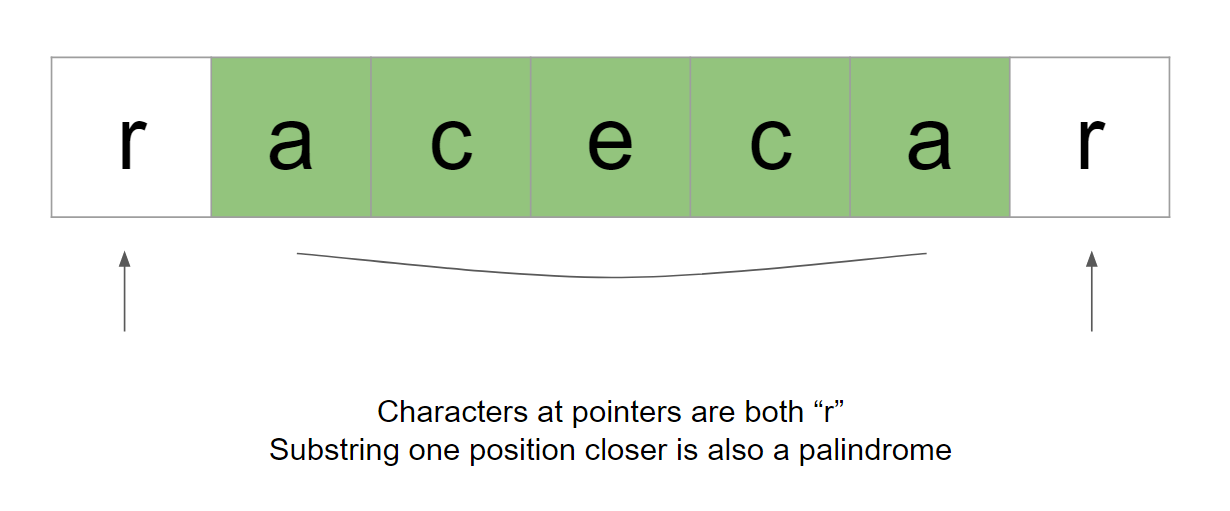

We know that all substrings of length 1 are palindromes. From this, we can check if each substring of length 3 is a palindrome using the above fact. We just need to check every i, j pair where j - i = 2. Once we know all palindromes of length 3, we can use that information to find all palindromes of length 5, and then 7, and so on.

What about even-length palindromes? A substring of length 2 is a palindrome if both characters are equal. That is, i, i + 1 is a palindrome if s[i] == s[i + 1]. From this, we can use the earlier logic to find all palindromes of length 4, then 6, and so on.

Let's use a table dp with dimensions of n * n. dp[i][j] is a boolean representing if the substring with inclusive bounds i, j is a palindrome. We initialize dp[i][i] = true for the substrings of length 1, and then dp[i][i + 1] = (s[i] == s[i + 1]) for the substrings of length 2.

Now, we need to populate the table. We iterate over all i, j pairs, starting with pairs that have a difference of 2 (representing substrings of length 3), then pairs with a difference of 3, then 4, and so on. For each i, j pair, we check the condition from earlier:

s[i] == s[j] && dp[i + 1][j - 1]

If this condition is true, then the substring with inclusive bounds i, j must be a palindrome. We set dp[i][j] = true.

Because we are starting with the shortest substrings and iterating toward the longest substrings, every time we find a new palindrome, it must be the longest one we have seen so far. We can use this fact to keep track of the answer on the fly.

Algorithm

        1. Initialize n = s.length and a boolean table dp with size n * n, and all values to false.

        2. Initialize ans = [0, 0]. This will hold the inclusive bounds of the answer.

        3. Set all dp[i][i] = true.

        4. Iterate over all pairs i, i + 1. For each one, if s[i] == s[i + 1], then set dp[i][i + 1] = true and update ans = [i, i + 1].

        5. Now, we populate the dp table. Iterate over diff from 2 until n. This variable represents the difference j - i.

        6. In a nested for loop, iterate over i from 0 until n - diff.

            1. Set j = i + diff.
            2. Check the condition: if s[i] == s[j] && dp[i + 1][j - 1], we found a palindrome.
            3. In that case, set dp[i][j] = true and ans = [i, j]
        7. Retrieve the answer bounds from ans as i, j. Return the substring of s starting at index i and ending with index j.

In [8]:
def longpalindromes(s):
    n = len(s)
    dp = ([False] * n for _ in range(n))
    ans = [0,0]
    for i in range(n):
        dp[i][i]=True

    for i in range(n-1):
        if s[i] == s[i+1]:
            dp[i][i+1] = True
            ans = [i,i+1]
    for diff in range(2, n):
        for i in range(0, n-diff):
            j = i + diff
            if s[i] == s[j] and dp[i+1][j-1]:
                dp[i][j]= True
                ans = [i,j]

    i,j = ans
    return s[i:j+1]


a = longpalingstring('aaabddcad')
print(a)

aaabddca


Approach 3: Expand From Centers

Intuition

In the first approach, the palindrome check cost $O(n)$. In the second approach, the palindrome check cost $O(1)$. This allowed us to improve the time complexity from $O(n^3)$ to $O(n^2)$.

The problem with the second approach is that we always iterated over $O(n^2)$ states of i, j. Can we optimize further to minimize the number of iterations required?

In the first approach, we implemented a palindrome check using two pointers. We started by checking the first and last characters, then the second and second last characters, and so on.

Instead of starting the pointers at the edges and moving inwards, the same logic can be applied when starting the pointers at the center and moving outwards. A palindrome mirrors around its center. Let's say you had s = "racecar". If we start both pointers at the middle ("e") and move them away from each other, we can see that at every iteration, the characters match: e -> c -> a -> r.

The previous two approaches focused on the bounds of a substring - i, j. There are O(n2)O(n^2)O(n 
2
 ) bounds, but only O(n)O(n)O(n) centers. For each index i, we can consider odd-length palindromes by starting the pointers at i, i. To consider the even length palindromes, we can start the pointers at i, i + 1. There are nnn starting points for the odd-length palindromes and n−1n - 1n−1 starting points for the even-length palindromes - that's 2n−1=O(n)2n - 1 = O(n)2n−1=O(n) starting points in total.

This is very promising - we can lower the minimum iterations required if we focus on the centers instead of on the bounds. Let's use a helper method expand(i, j) that starts two pointers left = i and right = j. In this method, we will consider i, j as a center. When i == j, we are considering odd-length palindromes. When i != j, we are considering even-length palindromes. We will expand from the center as far as we can to find the longest palindrome, and then return the length of this palindrome.

Let's say that we have a center i, i. We call expand and find a length of length. What are the bounds of the palindrome? Because we are centered at i, i, it means length must be odd. If we perform floor division of length by 2, we will get the number of characters dist on each side of the palindrome. For example, given s = "racecar", we have length = 7 and dist = 7 / 2 = 3. There are 3 characters on each side - "rac" on the left and "car" on the right. Therefore, we can determine that the bounds of the palindrome are i - dist, i + dist.

What about a center at i, i + 1? length must be even now. If we have a palindrome with length 2, then length / 2 = 1, but there are zero characters on each side of the center. We can see that dist is too large by 1. Therefore, we will calculate dist as (length / 2) - 1 instead. Now, dist correctly represents the number of characters on each side. The bounds of the palindrome are i - dist, i + 1 + dist.


Algorithm

        1 Create a helper method expand(i, j) to find the length of the longest palindrome centered at i, j.
                Set left = i and right = j.
                While left and right are both in bounds and s[left] == s[right], move the pointers away from each other.
                The formula for the length of a substring starting at left and ending at right is right - left + 1.
                However, when the while loop ends, it implies s[left] != s[right]. Therefore, we need to subtract 2. Return right - left - 1.
        2. Initialize ans = [0, 0]. This will hold the inclusive bounds of the answer.
        3. Iterate i over all indices of s.
                Find the length of the longest odd-length palindrome centered at i: oddLength = expand(i, i).
                If oddLength is the greatest length we have seen so far, i.e. oddLength > ans[1] - ans[0] + 1, update ans.
                Find the length of the longest odd-length palindrome centered at i: evenLength = expand(i, i + 1).
                If evenLength is the greatest length we have seen so far, update ans.
        4.Retrieve the answer bounds from ans as i, j. Return the substring of s starting at index i and ending with index j.

In [9]:
def palindrome_txt(s):
    def expand(i,j):
        left = i
        right = j
        while left >= 0 and right <= len(s) and s[left] == s[right]:
                left -= 1
                right += 1
        return right - left - 1
    ans = [0, 0]
    for i in range(len(s)):
        oddlength = expand(i, i)
        if oddlength > ans[1] - ans[0] + 1:
            dist = oddlength // 2
            ans = [i-dist, i+dist]
        evenlength = expand(i, i+1)
        if evenlength > ans[1] - ans[0] + 1:
            dist = (evenlength // 2) - 1
            ans = [i - dist, i + 1 + dist]

    i, j = ans
    return s[i:j + 1]




Approach 4: Manacher's Algorithm

Believe it or not, this problem can be solved in linear time.

Manacher's algorithm finds the longest palindromic substring in O(n) time and space.

Note: this algorithm is completely out of scope for coding interviews. Because of this, we will not be talking about the algorithm in detail. This approach has been included for the sake of completeness and for those who are curious about algorithms beyond the scope of interviews.

If you wish to learn more about Manacher's algorithm, please reference the above link.

In [ ]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        s_prime = '#' + '#'.join(s) + '#'
        n = len(s_prime)
        palindrome_radii = [0] * n
        center = radius = 0
        
        for i in range(n):
            mirror = 2 * center - i

            if i < radius:
                palindrome_radii[i] = min(radius - i, palindrome_radii[mirror])

            while (i + 1 + palindrome_radii[i] < n and 
                   i - 1 - palindrome_radii[i] >= 0 and
                   s_prime[i + 1 + palindrome_radii[i]] == s_prime[i - 1 - palindrome_radii[i]]):
                palindrome_radii[i] += 1

            if i + palindrome_radii[i] > radius:
                center = i
                radius = i + palindrome_radii[i]

        max_length = max(palindrome_radii)
        center_index = palindrome_radii.index(max_length)
        start_index = (center_index - max_length) // 2
        longest_palindrome = s[start_index: start_index + max_length]

        return longest_palindrome